#Sumber Data
## Cloud google BigQuery 


In [ ]:
'''
SELECT * 
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` 
'''

'\nSELECT * \nFROM `bigquery-public-data.covid19_jhu_csse_eu.summary` \n'

# i. Objective

Menampilkan pendataan data covid US selama tahun 2020

## Problem statement
- bagaimana trend covid yang terjadi pada negara bagian Texas 
- bagaimana kasus Covid di US pada tahun 2020 berdasarkan data masing-masing 
admin2 
- bagaimana kasus Covid US, pada masing masing negara bagian selama tahun 2020 dengan admin2 adalah 'Washington'


# ii.  import pustaka 

In [ ]:
import pandas as pd
import numpy as np

# iii. Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#membaca file yang yang sudah diupload
we = pd.read_csv('/content/drive/MyDrive/bq-results-20230331-093519-1680255881116/h8dsft_P0GC1_AnsariIndrawan.csv')

In [ ]:
#menampilkan 5 baris pertama dari data tabel
we.head( )

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Virginia,US,2020-05-15,37.019097,-78.663141,POINT(-78.66314092 37.01909701),11.0,0.0,0.0,11.0,51037.0,Charlotte,"Charlotte, Virginia, US"
1,North Carolina,US,2020-05-15,35.703944,-79.255415,POINT(-79.25541492 35.70394416),495.0,24.0,0.0,471.0,37037.0,Chatham,"Chatham, North Carolina, US"
2,Alabama,US,2020-05-15,34.178060,-85.606390,POINT(-85.60638968 34.17805983),26.0,0.0,0.0,26.0,1019.0,Cherokee,"Cherokee, Alabama, US"
3,Texas,US,2020-05-15,31.837258,-95.165599,POINT(-95.16559897 31.837258),31.0,1.0,0.0,30.0,48073.0,Cherokee,"Cherokee, Texas, US"
4,Virginia,US,2020-05-15,36.676700,-76.305457,POINT(-76.30545744 36.67670048),379.0,10.0,0.0,369.0,51550.0,Chesapeake,"Chesapeake, Virginia, US"


In [ ]:
#Menampilkan 5 baris akhir dari data tabel
we.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
4264075,Wisconsin,US,2022-09-29,42.679496,-89.602433,POINT(-89.60243287 42.6794956),10764.0,60.0,NaN,NaN,55045.0,Green,"Green, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,44.318649,-90.805668,POINT(-90.80566792 44.31864893),6538.0,45.0,NaN,NaN,55053.0,Jackson,"Jackson, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,43.906325,-91.114511,POINT(-91.11451093 43.90632465),41002.0,198.0,NaN,NaN,55063.0,La Crosse,"La Crosse, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,44.475587,-89.501530,POINT(-89.50152965 44.47558711),21209.0,165.0,NaN,NaN,55097.0,Portage,"Portage, Wisconsin, US"
4264079,Wisconsin,US,2022-09-29,43.425741,-89.949661,POINT(-89.94966132 43.42574087),19382.0,146.0,NaN,NaN,55111.0,Sauk,"Sauk, Wisconsin, US"


In [ ]:
#melihat jumlah baris dan kolom sama dengan data yang ada di BigQuery
we.shape

(4264080, 13)

In [ ]:
#menampilkan data dari kolom report_date dengan menjumlahkan data berdasarkan negara yang sama
we["country_region"].value_counts()

US                     3513278
Russia                   84117
Japan                    49860
India                    37195
China                    36851
                        ...   
Macao SAR                    1
Channel Islands              1
Russian Federation           1
Taipei and environs          1
Ivory Coast                  1
Name: country_region, Length: 252, dtype: int64

This folder contains daily case reports. All timestamps are in UTC (GMT+0).

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

Field description

`FIPS`: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.

`Admin2`: County name. US only.(county, internal territorial and administrative division in the United Kingdom, United States : google)

`Province_State`: Province, state or dependency name.

`Country_Region`: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.

`Last Update`: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).

`Lat and Long_`: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.

`Confirmed`: Counts include confirmed and probable (where reported).

`Deaths`: Counts include confirmed and probable (where reported).

`Recovered`: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project. We stopped to maintain the recovered cases (see Issue #3464 and Issue #4465).

`Active`: Active cases = total cases - total recovered - total deaths. This value is for reference only after we stopped to report the recovered cases (see Issue #4465)

In [ ]:
# menampilkan info dari data tabel yang panggil menunjukan nama kolom dan type data
we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264080 entries, 0 to 4264079
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   latitude        float64
 4   longitude       float64
 5   location_geom   object 
 6   confirmed       float64
 7   deaths          float64
 8   recovered       float64
 9   active          float64
 10  fips            float64
 11  admin2          object 
 12  combined_key    object 
dtypes: float64(7), object(6)
memory usage: 422.9+ MB


#iv. Data Cleaning

In [ ]:
#menampilkan kolom yang memiliki missing value dengan logika boolean
we.isnull()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264075,False,False,False,False,False,False,False,False,True,True,False,False,False
4264076,False,False,False,False,False,False,False,False,True,True,False,False,False
4264077,False,False,False,False,False,False,False,False,True,True,False,False,False
4264078,False,False,False,False,False,False,False,False,True,True,False,False,False


In [ ]:
#menampilkan jumlah dari missing value pada masing masing kolom
we.isnull().sum()

province_state     191891
country_region          1
date                    0
latitude            95263
longitude           95263
location_geom       95263
confirmed              19
deaths                442
recovered         2828489
active            2836568
fips               764588
admin2             759505
combined_key         7618
dtype: int64

In [ ]:
#menampilkan setiap baris data pada kolom recovered
we['recovered']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4264075    NaN
4264076    NaN
4264077    NaN
4264078    NaN
4264079    NaN
Name: recovered, Length: 4264080, dtype: float64

In [ ]:
#menampilkan setiap baris data pada kolom active
we['active']

0           11.0
1          471.0
2           26.0
3           30.0
4          369.0
           ...  
4264075      NaN
4264076      NaN
4264077      NaN
4264078      NaN
4264079      NaN
Name: active, Length: 4264080, dtype: float64

In [ ]:
#menyalin data frame we kedalam data frame df
df = we.copy()

In [ ]:
df["date"] = pd.to_datetime(df["date"], format="%Y/%m/%d")

In [ ]:
#menampilkan informasi dari data frame df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264080 entries, 0 to 4264079
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   province_state  object        
 1   country_region  object        
 2   date            datetime64[ns]
 3   latitude        float64       
 4   longitude       float64       
 5   location_geom   object        
 6   confirmed       float64       
 7   deaths          float64       
 8   recovered       float64       
 9   active          float64       
 10  fips            float64       
 11  admin2          object        
 12  combined_key    object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 422.9+ MB


In [ ]:
#melihat kolom apa saja yang tidak memiliki nilai
df.isnull().sum()

province_state     191891
country_region          1
date                    0
latitude            95263
longitude           95263
location_geom       95263
confirmed              19
deaths                442
recovered         2828489
active            2836568
fips               764588
admin2             759505
combined_key         7618
dtype: int64

In [ ]:
#menghilangkan kolom 'recovered' karena tidak ada data yang ditampilkan dari sumbernya
#menghilangkan kolom "latitude", "longitude", "location_geom" karena tidak dibutuhkan
location = ["recovered"]

In [ ]:
#menghilangkan kolom yang terlalu banyak menimbulkan missing value dan tidak digunkan
df.drop(location, inplace=True, axis=1)

In [ ]:
#sesuai deskripsi kolom active merupakan nilai selisih 'confirmed' - 'deaths' dan terdapat nilai NaN
#sehingga kita operasikan ulang untuk mendapatkan nilai selisih dan tidak menimbulkan missiing value
df["active"] = df.confirmed - df.deaths 

In [ ]:
#menghilangkan missing value dari setiap baris data frame
df_cleaned = df.dropna()

In [ ]:
##melihat kolom apa saja yang tersisa dan sudah tidak mengandung missing value
df_cleaned.isnull().sum()

province_state    0
country_region    0
date              0
latitude          0
longitude         0
location_geom     0
confirmed         0
deaths            0
active            0
fips              0
admin2            0
combined_key      0
dtype: int64

In [ ]:
#mengganti nama kolom agar lebih singkat
df_renamed = df_cleaned.rename(
    columns={"country_region	": "Country"}
)
df_renamed.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,active,fips,admin2,combined_key
0,Virginia,US,2020-05-15,37.019097,-78.663141,POINT(-78.66314092 37.01909701),11.0,0.0,11.0,51037.0,Charlotte,"Charlotte, Virginia, US"
1,North Carolina,US,2020-05-15,35.703944,-79.255415,POINT(-79.25541492 35.70394416),495.0,24.0,471.0,37037.0,Chatham,"Chatham, North Carolina, US"
2,Alabama,US,2020-05-15,34.178060,-85.606390,POINT(-85.60638968 34.17805983),26.0,0.0,26.0,1019.0,Cherokee,"Cherokee, Alabama, US"
3,Texas,US,2020-05-15,31.837258,-95.165599,POINT(-95.16559897 31.837258),31.0,1.0,30.0,48073.0,Cherokee,"Cherokee, Texas, US"
4,Virginia,US,2020-05-15,36.676700,-76.305457,POINT(-76.30545744 36.67670048),379.0,10.0,369.0,51550.0,Chesapeake,"Chesapeake, Virginia, US"


In [ ]:
#menghilangkan nilai data negatif pada kolom active
df_renamed.drop(df_renamed[df_renamed ["active"] < 0].index, inplace = True)

# v. Explorasi Data


In [ ]:
#menyalin data berdasarkan negara US pada data frame df renamed kedalam data frame covid_us 
covid_us = df_renamed[df_renamed['country_region'] == 'US']

In [ ]:
#menampilkan baris dan kolom pada data frmae covid us
covid_us.shape

(3424891, 12)

In [ ]:
#menampilkan informasi dari data frmae covid us
covid_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424891 entries, 0 to 4264079
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   province_state  object        
 1   country_region  object        
 2   date            datetime64[ns]
 3   latitude        float64       
 4   longitude       float64       
 5   location_geom   object        
 6   confirmed       float64       
 7   deaths          float64       
 8   active          float64       
 9   fips            float64       
 10  admin2          object        
 11  combined_key    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 339.7+ MB


In [ ]:
#menampilkan jumlah data unik pada kolom fips dari data frame covid us 
covid_us['fips'].nunique()

3223

In [ ]:
#menampilkan jumlah data unik pada kolom province state dari data frame covid us 
covid_us['province_state'].nunique()

52

In [ ]:
#menghitung jumlah data unik dalam kolom province state dari data frame covid us
covid_us['province_state'].value_counts()

Texas                   271276
Georgia                 172003
Virginia                143866
Kentucky                129048
Missouri                123121
Kansas                  111381
Illinois                109812
North Carolina          108044
Iowa                    106515
Tennessee               102779
Indiana                  99580
Nebraska                 98354
Ohio                     95176
Minnesota                93506
Michigan                 89555
Mississippi              88699
Oklahoma                 82747
Arkansas                 80934
Wisconsin                77631
Puerto Rico              75270
Alabama                  72532
Pennsylvania             72523
Florida                  72496
South Dakota             69968
Louisiana                69269
Colorado                 68691
New York                 66531
California               62507
West Virginia            59034
Montana                  57884
North Dakota             56070
South Carolina           49811
Idaho   

In [ ]:
#menghitung jumlah data unik dalam kolom admin 2 dari data frame covid us
covid_us['admin2'].value_counts()

Washington            32474
Jefferson             28094
Franklin              26988
Lincoln               25827
Jackson               25818
                      ...  
Doña Ana                  9
Lake and Peninsula        9
Elko County               4
Washington County         4
Walla Walla County        1
Name: admin2, Length: 1924, dtype: int64

In [ ]:
#menghitung jumlah data unik dalam kolom fips dari data frame covid us
covid_us['fips'].value_counts()

32007.0    1087
35013.0    1086
11001.0    1084
53071.0    1084
47091.0    1083
           ... 
2105.0        9
49001.0       9
49039.0       9
15005.0       9
49023.0       9
Name: fips, Length: 3223, dtype: int64

## query groupby agregat data

In [ ]:
#melihat kasus covid di Texas pada tahun 2020 
Texas_Covid_2020 = covid_us[
          (covid_us["province_state"] == 'Texas') & 
#mengambil data tabel pada kolom province state hanya province Texas
          (covid_us["date"].dt.year == 2020) 
#mengambil data tabel pada kolom date hanya pada tahun 2020
].groupby("date", as_index=False)['confirmed', 'deaths', 'active'].sum()
Texas_Covid_2020
#menampilkan tabel dengan date sebagai acuan. confirmed, deaths, dan	active diatur data dijumlahkan pada tiap hari 
#diurutkan berdasarkan deaths kasus paling tinggi kerendah 

<ipython-input-33-1b48ec89ad6a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Texas_Covid_2020 = covid_us[


,date,confirmed,deaths,active
0,2020-03-22,643.0,7.0,636.0
1,2020-03-23,758.0,9.0,749.0
2,2020-03-24,955.0,12.0,943.0
3,2020-03-25,1229.0,15.0,1214.0
4,2020-03-26,1563.0,21.0,1542.0
...,...,...,...,...
280,2020-12-27,1690986.0,26966.0,1664020.0
281,2020-12-28,1700549.0,27038.0,1673511.0
282,2020-12-29,1730084.0,27282.0,1702802.0
283,2020-12-30,1750250.0,27600.0,1722650.0


Tabel diatas memperlihatkan trend covid yang terjadi pada texas selama tahun 2020, dengan total 284 hari data update data yang ditampilkan adalah data akumulasi dari data kasus hari sebelumnya.




In [ ]:
#from pandas.core.base import value_counts
#menampilkan kasus Covid US di provinsi mana saja dengan admin2 adalah 'Washington' pada tahun 2020 
covid2020_by_washington = covid_us[
          (covid_us["date"].dt.year == 2020) &
#mengambil data tabel pada kolom date hanya pada tahun 2020
          (covid_us["admin2"] == 'Washington')
##mengambil data tabel pada kolom admin2 hanya pada Washington
].groupby('province_state', as_index=False).agg({'confirmed':'max', 'deaths':'max', 'active':'max', 'fips':'unique'}).sort_values('deaths', ascending=False)
covid2020_by_washington
#menampilkan tabel dengan province state sebagai acuan, confirmed, deaths,	active, diatur data tertinggi yang terjadi pada tiap kota dan fips menunjukan kode kabupaten yang didata
#diurutkan berdasarkan deaths kasus paling tinggi kerendah 

,province_state,confirmed,deaths,active,fips
1,Arkansas,21420.0,222.0,21198.0,[5143.0]
14,Minnesota,18467.0,190.0,18277.0,[27163.0]
25,Tennessee,10223.0,165.0,10058.0,[47179.0]
13,Maryland,8206.0,149.0,8057.0,[24043.0]
22,Oregon,16070.0,141.0,15929.0,[41067.0]
23,Pennsylvania,8947.0,131.0,8816.0,[42125.0]
15,Mississippi,4259.0,116.0,4143.0,[28151.0]
24,Rhode Island,4482.0,114.0,4368.0,[44009.0]
30,Wisconsin,13185.0,102.0,13083.0,[55131.0]
11,Louisiana,3135.0,87.0,3048.0,[22117.0]


Tabel diatas memperlihatkan admin2 Washington mendata kasus Covid 31 provinsi berbeda dari total 52 provinsi diUS selama tahun 2020. data covid yang ditampilkan memuat data kasus paling tinggi pada tiap provinsi selama 2020, dengan kolom fips sebagai kode lokasi detail(kabupaten) di US

In [ ]:
#menampilkan data kasus Covid di US pada tahun 2020 berdasarkan masing-masing admin2  
admin2_covid_death = covid_us[
          (covid_us["date"].dt.year == 2020) &
#mengambil data tabel pada kolom date hanya pada tahun 2020
          (covid_us["admin2"] != 'Unassigned')
#mengambil data tabel hanya pada kolom admin2 dengan tanpa data Unassigned 
].groupby('admin2', as_index=False).agg({'confirmed':'max', 'deaths':'max', 'active':'max', 'fips':'nunique'}).sort_values('confirmed', ascending=False)
#menampilkan tabel dengan admin2 sebagai acuan, confirmed, deaths,	active, diatur data tertinggi yang didata admin2 dan fips menunjukan jumlah kabupaten yang didata
#diurutkan berdasarkan corfirmed kasus paling tinggi kerendah 
admin2_covid_death

,admin2,confirmed,deaths,active,fips
1030,Los Angeles,770602.0,10345.0,760257.0,1
414,Cook,393652.0,8285.0,385367.0,3
1072,Maricopa,318827.0,5110.0,313717.0,1
1138,Miami-Dade,298873.0,4188.0,294685.0,1
761,Harris,237727.0,3402.0,234325.0,2
...,...,...,...,...,...
1530,Sanpete,0.0,0.0,0.0,1
966,Lake and Peninsula,0.0,0.0,0.0,1
809,Hoonah-Angoon,0.0,0.0,0.0,1
885,Juab,0.0,0.0,0.0,1


Tabel diatas menampilkan data kasus Covid di US dengan masing-masing admin2 yang bertanggung jawab dengan data, dimana terdapat sebanyak 1935 admin2. akumulasi kasus covid tertinggi tercatat pada Los Angeles  

## visualisasi data

In [ ]:
%matplotlib inline

<Axes: >

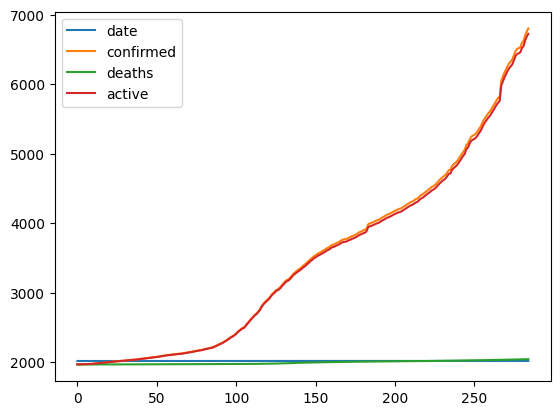

In [ ]:
Texas_Covid_2020.plot()

grafik diatas memperlihatkan trend covid yang terjadi pada texas selama tahun 2020, dengan total 284 hari data update data yang ditampilkan adalah data akumulasi dari data kasus hari sebelumnya. Sumbu x adalah nilai dari kasus covid, dan sumbu y adalah index dari data

<Axes: >

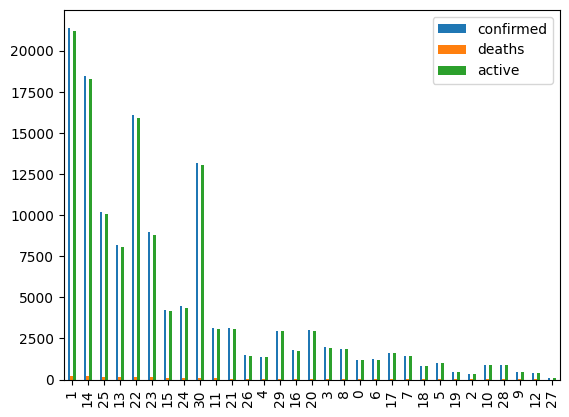

In [ ]:
covid2020_by_washington.plot(kind="bar")

grafik diatas memperlihatkan admin2 Washington mendata kasus Covid 31 provinsi berbeda diUS selama tahun 2020. data covid yang ditampilkan memuat data kasus paling tinggi pada tiap provinsi selama 2020, diurutkan berdasarkan tingkat kematian ddari tinggi kerendah. Sumbu x adalah nilai dari kasus covid, dan sumbu y adalah index dari data

<Axes: >

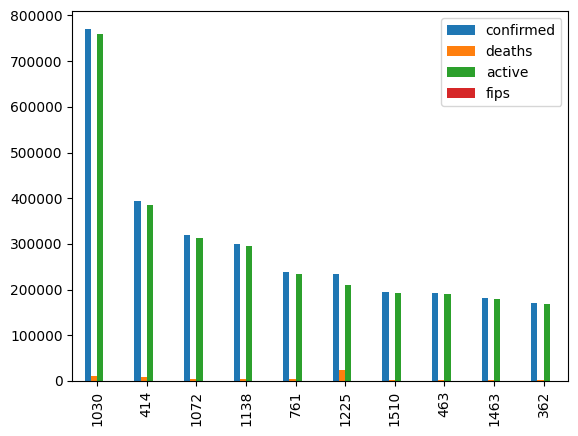

In [ ]:
admin2_covid_death.head(10).plot(kind="bar")

grafik diatas menampilkan data kasus Covid di US dengan 10 admin2. akumulasi kasus covid tertinggi tercatat pada admin2 dengan nomor index 1030. Sumbu x adalah nilai dari kasus covid, dan sumbu y adalah index dari data

# vi kesimpulan



Kesimpulan dari data yang saya kerjakan adalah memperlihatkan pendataan data Covid di US pada tahun 2020 dengan pembaharuan data selama 284 hari. Terdapat 52 provinci state, dan 3287 fips sebagai code countis di US yang terdata dengan admin2 sebanyak 1935 yang bertanggung jawab dengan data.